## Keras Syntext Basics

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
# %matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
# plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
#df = pd.read_csv("drive/MyDrive/Colab_Files/data/fake_reg.csv")

In [4]:
df = pd.read_csv("fake_reg.csv")

### Exploratory Data Analysis and Visualization

In [5]:
df.head()

,price,feature1,feature2
0,461.528,999.788,999.766
1,548.130,998.862,1001.042
2,410.297,1000.070,998.844
3,540.382,999.952,1000.441
4,546.025,1000.446,1000.339


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     1000 non-null   float64
 1   feature1  1000 non-null   float64
 2   feature2  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,1000.000,498.673,93.785,223.347,433.026,502.382,564.922,774.408
feature1,1000.000,1000.014,0.974,997.058,999.332,1000.010,1000.638,1003.208
feature2,1000.000,999.980,0.948,996.996,999.316,1000.002,1000.645,1002.666


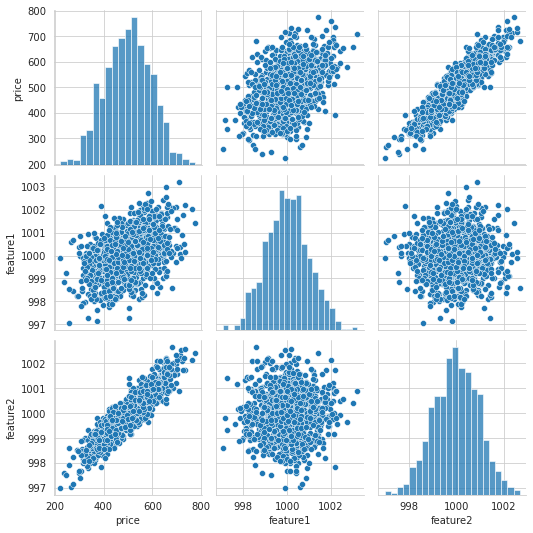

In [8]:
sns.pairplot(df)

In [9]:
df.corr()

,price,feature1,feature2
price,1.000,0.444,0.908
feature1,0.444,1.000,0.031
feature2,0.908,0.031,1.000


### Preprocessing of Data
- Train | Test Split, Scalling

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = df[['feature1', 'feature2']].values
y = df['price'].values
# Sondaki .values DataFrame ve Series i array e dönüştürüyor.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [13]:
X_train.shape

(700, 2)

In [14]:
X_test.shape

(300, 2)

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
help(MinMaxScaler)
# Not: Deep Learning de genellikle MinMaxScaler kullanılıyor. Ancak oulier fazla ise RobustScaler de kullanılabilir.

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters
 |  ----------
 |  feature_range : tuple (min, max), default=(0, 1)
 |      Desired range of transformed data.
 |  
 |  copy : bool, default=True
 |      Set to Fal

In [17]:
scaler = MinMaxScaler()

In [18]:
scaler.fit(X_train)

MinMaxScaler()

In [19]:
X_train = scaler.transform(X_train)

In [20]:
X_test = scaler.transform(X_test)
# Test datasında fit işlemi uygulamıyoruz, data leakage i önlemek için
# Deep Learning bizden array istediği için yukarıda .values ile array e çevirmiştik. Biz bu işlemi eğer datamızı scale etmeyexek isek .values ile array e dönüştürüyoruz. Eğer modelimizi scale edeceksek .values kullanmamıza gerek yoktur. Çünkü scale zaten datayı array e çeviriyor.

In [21]:
X_train.max()

1.0

In [22]:
X_train.min()

0.0

In [23]:
X_test.max()

1.0186515935232023

In [24]:
X_test.min()

-0.014108392024525074

In [25]:
# Not: X_test verisinin max ve min değerlerinin tam 1 ve 0 olmamasının nedeni scale işlemimizi sadece train ile fit (eğitmek) etmemizden kaynaklanıyor.

### Modelling

In [26]:
import tensorflow as tf

In [27]:
tf.__version__

'2.5.0'

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [29]:
help(Sequential)

Help on class Sequential in module tensorflow.python.keras.engine.sequential:

class Sequential(tensorflow.python.keras.engine.functional.Functional)
 |  Sequential(*args, **kwargs)
 |  
 |  `Sequential` groups a linear stack of layers into a `tf.keras.Model`.
 |  
 |  `Sequential` provides training and inference features on this model.
 |  
 |  Examples:
 |  
 |  >>> # Optionally, the first layer can receive an `input_shape` argument:
 |  >>> model = tf.keras.Sequential()
 |  >>> model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
 |  >>> # Afterwards, we do automatic shape inference:
 |  >>> model.add(tf.keras.layers.Dense(4))
 |  
 |  >>> # This is identical to the following:
 |  >>> model = tf.keras.Sequential()
 |  >>> model.add(tf.keras.Input(shape=(16,)))
 |  >>> model.add(tf.keras.layers.Dense(8))
 |  
 |  >>> # Note that you can also omit the `input_shape` argument.
 |  >>> # In that case the model doesn't have any weights until the first call
 |  >>> # to a training/evalua

In [30]:
help(Dense)

Help on class Dense in module tensorflow.python.keras.layers.core:

class Dense(tensorflow.python.keras.engine.base_layer.Layer)
 |  Dense(*args, **kwargs)
 |  
 |  Just your regular densely-connected NN layer.
 |  
 |  `Dense` implements the operation:
 |  `output = activation(dot(input, kernel) + bias)`
 |  where `activation` is the element-wise activation function
 |  passed as the `activation` argument, `kernel` is a weights matrix
 |  created by the layer, and `bias` is a bias vector created by the layer
 |  (only applicable if `use_bias` is `True`). These are all attributes of
 |  `Dense`.
 |  
 |  Note: If the input to the layer has a rank greater than 2, then `Dense`
 |  computes the dot product between the `inputs` and the `kernel` along the
 |  last axis of the `inputs` and axis 1 of the `kernel` (using `tf.tensordot`).
 |  For example, if input has dimensions `(batch_size, d0, d1)`,
 |  then we create a `kernel` with shape `(d1, units)`, and the `kernel` operates
 |  along a

In [31]:
# First way to create model
model = Sequential([Dense(units = 4, activation = "relu"),
                    Dense(units = 4, activation = "relu"),
                    Dense(units = 4, activation = "relu"),
                    Dense(units = 1)])

In [32]:
# Second way to create model (recommended)
model = Sequential()
model.add(Dense(units = 4, activation = "relu"))     # input_dim = 2 or input_dim = X_train.shape[0]
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(1))
# İkinci yöntem tavsiye ediliyor. Çünkü layer ekleme (Dense ile) ve çıkarma (başına # koyarak) daha pratik.
# Not: Modelimiz otomatik olarak input layer ı input sayısı kadar neuron/node ile oluşturuyor bu yüzden input layer ını yazmaya gerek yoktur fakat kullanılabiliyor.
# Not: Multilayer Perceptron un activation fonksiyonları output layer de değişiklik gösteriyor, hidden layer larda genellikle "relu" kullanılıyor. Çünkü öğrenme "relu" ile daha hızlı gerçekleşiyor.

In [33]:
model.compile(optimizer = "rmsprop", loss = "mse")
# Modeliiz Regression olduğu için optimizer ı"rmsprop", loss fonksiyonu "mse" kullandık.

### Choosing an optimizer and loss

Keep in mind what kind of problem you are trying to solve:

    # For a multi-class classification problem
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # For a mean squared error regression problem
    model.compile(optimizer='rmsprop',
                  loss='mse')

In [34]:
model.fit(x = X_train, y = y_train, batch_size = 32, epochs = 250)

Epoch 1/250
22/22 [==============================] - 0s 677us/step - loss: 256846.1719
Epoch 2/250
22/22 [==============================] - 0s 636us/step - loss: 256472.6875
Epoch 3/250
22/22 [==============================] - 0s 528us/step - loss: 256009.2344
Epoch 4/250
22/22 [==============================] - 0s 597us/step - loss: 255543.3438
Epoch 5/250
22/22 [==============================] - 0s 541us/step - loss: 255049.7656
Epoch 6/250
22/22 [==============================] - 0s 463us/step - loss: 254532.1562
Epoch 7/250
22/22 [==============================] - 0s 591us/step - loss: 254005.5938
Epoch 8/250
22/22 [==============================] - 0s 541us/step - loss: 253484.5781
Epoch 9/250
22/22 [==============================] - 0s 488us/step - loss: 252944.1094
Epoch 10/250
22/22 [==============================] - 0s 455us/step - loss: 252370.1250
Epoch 11/250
22/22 [==============================] - 0s 513us/step - loss: 251754.7812
Epoch 12/250
22/22 [=====================

22/22 [==============================] - 0s 474us/step - loss: 1623.4652
Epoch 95/250
22/22 [==============================] - 0s 626us/step - loss: 1597.9561
Epoch 96/250
22/22 [==============================] - 0s 461us/step - loss: 1571.7312
Epoch 97/250
22/22 [==============================] - 0s 415us/step - loss: 1543.7067
Epoch 98/250
22/22 [==============================] - 0s 534us/step - loss: 1518.2843
Epoch 99/250
22/22 [==============================] - 0s 577us/step - loss: 1492.2389
Epoch 100/250
22/22 [==============================] - 0s 598us/step - loss: 1471.2101
Epoch 101/250
22/22 [==============================] - 0s 456us/step - loss: 1441.5460
Epoch 102/250
22/22 [==============================] - 0s 434us/step - loss: 1420.5298
Epoch 103/250
22/22 [==============================] - 0s 424us/step - loss: 1394.2812
Epoch 104/250
22/22 [==============================] - 0s 420us/step - loss: 1369.3785
Epoch 105/250
22/22 [==============================] - 0s 585u

22/22 [==============================] - 0s 414us/step - loss: 33.9723
Epoch 190/250
22/22 [==============================] - 0s 457us/step - loss: 32.1477
Epoch 191/250
22/22 [==============================] - 0s 469us/step - loss: 31.1195
Epoch 192/250
22/22 [==============================] - 0s 423us/step - loss: 29.8924
Epoch 193/250
22/22 [==============================] - 0s 500us/step - loss: 29.1795
Epoch 194/250
22/22 [==============================] - 0s 478us/step - loss: 28.1805
Epoch 195/250
22/22 [==============================] - 0s 525us/step - loss: 27.5983
Epoch 196/250
22/22 [==============================] - 0s 522us/step - loss: 26.9016
Epoch 197/250
22/22 [==============================] - 0s 483us/step - loss: 26.3838
Epoch 198/250
22/22 [==============================] - 0s 463us/step - loss: 25.7912
Epoch 199/250
22/22 [==============================] - 0s 449us/step - loss: 25.9121
Epoch 200/250
22/22 [==============================] - 0s 493us/step - loss: 25

In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 4)                 12        
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 5         
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [36]:
# weight ve bias lar parametre olarak geçiyor. İlk dense_4 de iki input 4 nöran a ayrı ayrı bağlanarak 2*4 = 8 weight oluşturuyor ve ayrıca hidden layer deki herbir nöronda (4 adet) bias var. Buradan 8+4 = 12 parametre. dense_5 de 4*4=16, 16+4 = 20 parametre var. 

In [37]:
model.weights # ???? Bu noktadan sonra

[<tf.Variable 'dense_4/kernel:0' shape=(2, 4) dtype=float32, numpy=
 array([[ 2.0515707 , -0.34786057, -0.22993183, -0.3147563 ],
        [ 4.169927  , -0.67484784, -0.54955864,  0.3975306 ]],
       dtype=float32)>,
 <tf.Variable 'dense_4/bias:0' shape=(4,) dtype=float32, numpy=array([ 0.7260153 ,  0.        ,  0.        , -0.30397233], dtype=float32)>,
 <tf.Variable 'dense_5/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[ 2.9027054 ,  2.6511507 , -0.3136262 ,  2.4250357 ],
        [ 0.59510356, -0.5148317 , -0.64362353,  0.3691066 ],
        [-0.10575396,  0.44671673,  0.64845735, -0.48066232],
        [-0.35469177, -0.44939   ,  0.76457435,  0.65035826]],
       dtype=float32)>,
 <tf.Variable 'dense_5/bias:0' shape=(4,) dtype=float32, numpy=array([ 0.73555607,  0.7358764 , -0.05633521,  0.41019124], dtype=float32)>,
 <tf.Variable 'dense_6/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[ 2.6048126 ,  0.0903734 , -0.8056509 ,  2.9351711 ],
        [ 2.882421  , -0.5052513

In [38]:
model.history.history

{'loss': [256846.171875,
  256472.6875,
  256009.234375,
  255543.34375,
  255049.765625,
  254532.15625,
  254005.59375,
  253484.578125,
  252944.109375,
  252370.125,
  251754.78125,
  251097.53125,
  250384.9375,
  249619.0,
  248796.296875,
  247911.8125,
  246959.390625,
  245940.25,
  244846.171875,
  243684.015625,
  242446.453125,
  241128.234375,
  239729.59375,
  238238.953125,
  236670.953125,
  235010.65625,
  233258.78125,
  231409.046875,
  229465.671875,
  227413.765625,
  225275.953125,
  223015.65625,
  220656.609375,
  218194.78125,
  215613.84375,
  212936.015625,
  210129.765625,
  207208.015625,
  204161.484375,
  201015.703125,
  197755.453125,
  194368.890625,
  190853.78125,
  187218.15625,
  183491.046875,
  179621.28125,
  175643.046875,
  171539.40625,
  167332.953125,
  163002.109375,
  158573.46875,
  154026.640625,
  149392.84375,
  144645.5625,
  139811.546875,
  134897.765625,
  129862.8671875,
  124784.265625,
  119618.5703125,
  114395.8828125,
  1091

In [39]:
loss_df = pd.DataFrame(model.history.history)
loss_df

,loss
0,256846.172
1,256472.688
2,256009.234
3,255543.344
4,255049.766
...,...
245,24.200
246,24.276
247,24.263
248,24.148


<AxesSubplot:>

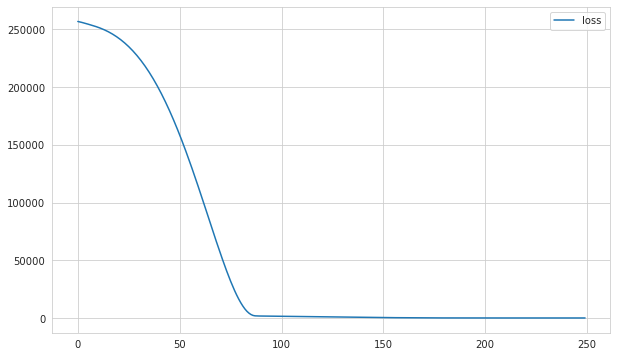

In [40]:
loss_df.plot()

(0.0, 3000.0)

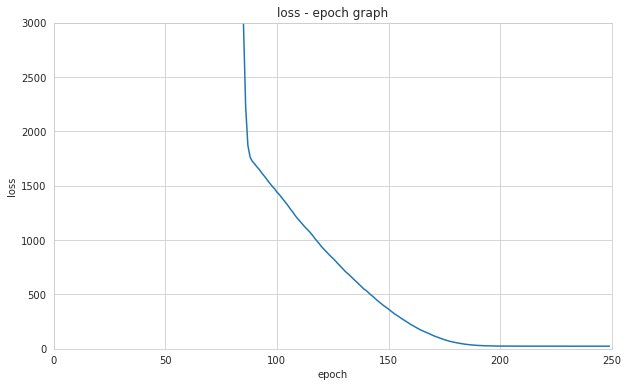

In [41]:
fig, ax= plt.subplots()
ax.plot(loss_df)
ax.set_xlabel("epoch")
ax.set_ylabel("loss")
ax.set_title("loss - epoch graph")
ax.set_xlim([0, 250]) # focusing on the given x values
ax.set_ylim([0, 3000]) # focusing on the given y values

### Model Performance

In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

In [43]:
model.evaluate(X_train, y_train, verbose=0)
# Buradaki sonuç modelimizin tahmindeki hata payını gösteriyor.

24.296567916870117

In [44]:
model.evaluate(X_test, y_test, verbose=0) # evaluate equal to mse

25.035783767700195

In [45]:
y_pred = model.predict(X_test)

In [46]:
explained_variance_score(y_test, y_pred)

0.9971655781780473

In [47]:
my_dict = {"Actual" : y_test, "Pred" : y_pred.reshape(-1,)}
compare = pd.DataFrame(my_dict)
compare.sample(10)

,Actual,Pred
94,501.814,506.498
34,424.811,424.352
57,624.247,626.503
36,507.443,501.480
126,375.312,372.931
274,505.747,501.092
223,514.882,510.873
146,381.853,383.936
143,357.296,356.726
118,699.734,699.960


<AxesSubplot:xlabel='Actual', ylabel='Pred'>

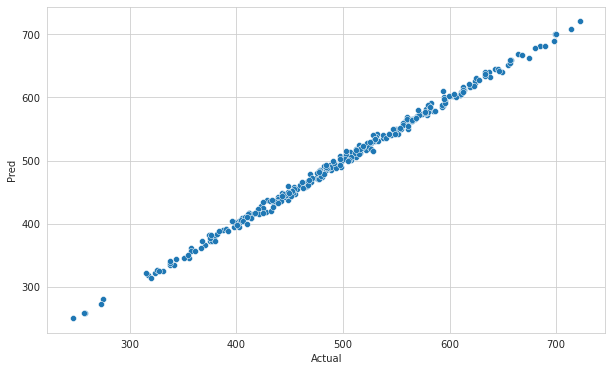

In [48]:
sns.scatterplot(x = 'Actual', y = 'Pred', data = compare)

In [49]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:", mse, "\nrmse:", rmse)

In [50]:
eval_metric(y_test, y_pred)

r2_score: 0.9971524458346593 
mae: 4.005954827640364 
mse: 25.035786390652415 
rmse: 5.003577359315274


### Final Model and Model Deployment

In [51]:
scaler = MinMaxScaler().fit(X)

In [52]:
import pickle
pickle.dump(scaler, open("scaler_fake_reg", "wb"))

In [53]:
X_scaled = scaler.transform(X)

In [54]:
final_model = Sequential()
final_model.add(Dense(units = 4, activation = "relu"))     # input_dim = 2 or input_dim = X_train.shape[0]
final_model.add(Dense(units = 4, activation = "relu"))
final_model.add(Dense(units = 4, activation = "relu"))
final_model.add(Dense(1))
final_model.compile(optimizer = "rmsprop", loss = "mse")
final_model.fit(x = X_scaled, y = y, batch_size = 32, epochs = 250)

Epoch 1/250
32/32 [==============================] - 0s 600us/step - loss: 257362.1094
Epoch 2/250
32/32 [==============================] - 0s 558us/step - loss: 257232.5469
Epoch 3/250
32/32 [==============================] - 0s 557us/step - loss: 257059.4062
Epoch 4/250
32/32 [==============================] - 0s 445us/step - loss: 256834.7656
Epoch 5/250
32/32 [==============================] - 0s 456us/step - loss: 256552.8906
Epoch 6/250
32/32 [==============================] - 0s 525us/step - loss: 256205.7812
Epoch 7/250
32/32 [==============================] - 0s 490us/step - loss: 255784.9688
Epoch 8/250
32/32 [==============================] - 0s 508us/step - loss: 255276.8125
Epoch 9/250
32/32 [==============================] - 0s 587us/step - loss: 254664.7188
Epoch 10/250
32/32 [==============================] - 0s 570us/step - loss: 253947.5781
Epoch 11/250
32/32 [==============================] - 0s 606us/step - loss: 253108.7188
Epoch 12/250
32/32 [=====================

32/32 [==============================] - 0s 418us/step - loss: 457.6045
Epoch 96/250
32/32 [==============================] - 0s 414us/step - loss: 430.0125
Epoch 97/250
32/32 [==============================] - 0s 409us/step - loss: 403.4336
Epoch 98/250
32/32 [==============================] - 0s 409us/step - loss: 378.7717
Epoch 99/250
32/32 [==============================] - 0s 421us/step - loss: 351.5085
Epoch 100/250
32/32 [==============================] - 0s 439us/step - loss: 331.4434
Epoch 101/250
32/32 [==============================] - 0s 565us/step - loss: 313.3127
Epoch 102/250
32/32 [==============================] - 0s 483us/step - loss: 294.5594
Epoch 103/250
32/32 [==============================] - 0s 540us/step - loss: 274.9244
Epoch 104/250
32/32 [==============================] - 0s 460us/step - loss: 254.3885
Epoch 105/250
32/32 [==============================] - 0s 446us/step - loss: 234.5922
Epoch 106/250
32/32 [==============================] - 0s 440us/step - l

32/32 [==============================] - 0s 480us/step - loss: 24.5990
Epoch 192/250
32/32 [==============================] - 0s 626us/step - loss: 25.0303
Epoch 193/250
32/32 [==============================] - 0s 535us/step - loss: 24.2578
Epoch 194/250
32/32 [==============================] - 0s 549us/step - loss: 24.9342
Epoch 195/250
32/32 [==============================] - 0s 469us/step - loss: 24.4824
Epoch 196/250
32/32 [==============================] - 0s 530us/step - loss: 24.6023
Epoch 197/250
32/32 [==============================] - 0s 502us/step - loss: 24.8037
Epoch 198/250
32/32 [==============================] - 0s 516us/step - loss: 24.8544
Epoch 199/250
32/32 [==============================] - 0s 449us/step - loss: 24.6297
Epoch 200/250
32/32 [==============================] - 0s 451us/step - loss: 24.6518
Epoch 201/250
32/32 [==============================] - 0s 398us/step - loss: 24.6683
Epoch 202/250
32/32 [==============================] - 0s 561us/step - loss: 24

In [55]:
from tensorflow.keras.models import load_model

H5 is a file format to store structured data, it's not a model by itself. Keras saves models in this format as it can easily store the weights and model configuration in a single file.

In [56]:
model.save('model_fake_reg.h5')  # creates a HDF5 file 'my_model.h5'

### Prediction-1

In [57]:
model_fake_reg = load_model('model_fake_reg.h5')

In [58]:
scaler_fake_reg = pickle.load(open("scaler_fake_reg", "rb"))

In [59]:
sample = [[998, 1000]]

In [60]:
sample_scaled = scaler_fake_reg.transform(sample)
# transform aynı zamanda sample DataFrame mı array e dönüştürdü

In [61]:
model_fake_reg.predict(sample_scaled)

array([[417.3386]], dtype=float32)

### Prediction-2